## Final Project Econometrics
---
Members:
- Nathaniel Tanuwijaya - 23102010031
- Ida Bagus Putra Brahmavidya - 23102010085
- Ida Bagus Michael Putra Dharma - 23102010015
- Emmanuel Grant Santoso - 23102010034

---

### Importing Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.tsa import stattools
%matplotlib inline
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_absolute_error

In [2]:
AAPL=pd.read_csv("AAPL.csv")
MSFT=pd.read_csv("MSFT.csv")

- AAPL disini merepresentasikan Apple
- MSFT disini merepresentasikan Microsoft

In [3]:
AAPL['Days Since 1 January 2017'] = range(1, len(AAPL) + 1)
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,Days Since 1 January 2017
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.257641,115127600,1
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.227131,84472400,2
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.365591,88774400,3
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.670675,127007600,4
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.924118,134247600,5
...,...,...,...,...,...,...,...,...
1253,2021-12-23,175.850006,176.850006,175.270004,176.279999,175.797394,68356600,1254
1254,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.836319,74919600,1255
1255,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.799164,79144300,1256
1256,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.888916,62348900,1257


In [4]:
MSFT['Days Since 1 January 2017'] = range(1, len(MSFT) + 1)
MSFT

,Date,Open,High,Low,Close,Adj Close,Volume,Days Since 1 January 2017
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,57.930531,20694100,1
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,57.671326,21340000,2
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,57.671326,24876000,3
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,58.171219,19922900,4
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,57.986069,20382700,5
...,...,...,...,...,...,...,...,...
1253,2021-12-23,332.750000,336.390015,332.730011,334.690002,333.223267,19617800,1254
1254,2021-12-27,335.459991,342.480011,335.429993,342.450012,340.949280,19947000,1255
1255,2021-12-28,343.149994,343.809998,340.320007,341.250000,339.754517,15661500,1256
1256,2021-12-29,341.299988,344.299988,339.679993,341.950012,340.451477,15042000,1257


---

In [5]:
MSFT["Date"]=pd.to_datetime(MSFT["Date"])
AAPL["Date"]=pd.to_datetime(AAPL["Date"])

In [6]:
MSFT["Year"]=MSFT["Date"].dt.year
AAPL["Year"]=AAPL["Date"].dt.year

---

### Exploratory Data Analysis

#### Plotting the close price progression from 1 January 2017 until 30 December 2021 for both Apple and Microsoft

##### For Apple:

Text(0, 0.5, 'Close Price')

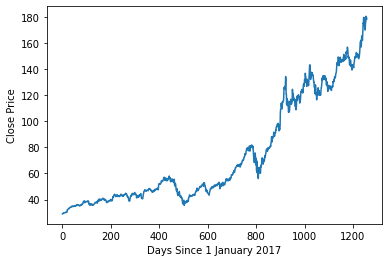

In [7]:
plt.plot(np.arange(len(AAPL["Close"])),AAPL["Close"])
plt.xlabel('Days Since 1 January 2017') 
plt.ylabel('Close Price')

##### For Microsoft:

Text(0, 0.5, 'Close Price')

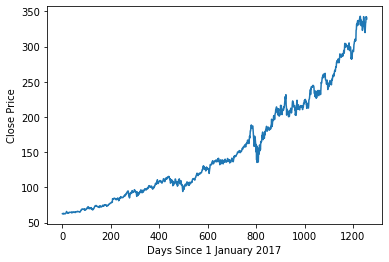

In [8]:
plt.plot(np.arange(len(MSFT["Close"])),MSFT["Close"])
plt.xlabel('Days Since 1 January 2017')
plt.ylabel('Close Price')

---

#### Plotting The Residual for Both Apple and Microsoft

##### For Apple:

In [9]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(AAPL.index).reshape((-1,1)), AAPL['Close'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.10207038438319362 and intercept=10.494921976371074
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

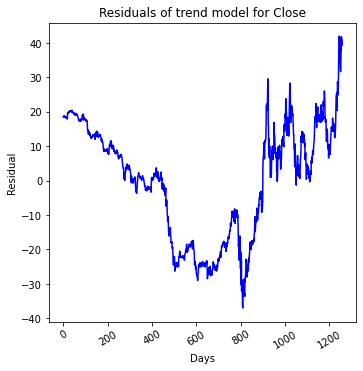

In [10]:
residuals = np.array(AAPL['Close']) - trend_model.predict(np.array(AAPL.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=AAPL.index).plot(color='b')
plt.title('Residuals of trend model for Close')
plt.xlabel('Days')
plt.ylabel('Residual')
plt.xticks(rotation=30)

In [11]:
AAPL['Residuals'] = residuals

Text(0, 0.5, 'Residual')

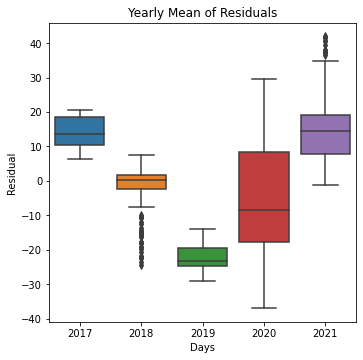

In [12]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=AAPL, y='Residuals', x='Year')
g.set_title('Yearly Mean of Residuals')
g.set_xlabel('Days')
g.set_ylabel('Residual')

##### Seasonality Apple

In order to examine the seasonality of the data we divided 1258 days into yearly periods. There are 5 years with 5 boxplots, and only 2018 as well as 2021 has outliers in the data. we can see clearly that for the first 3 years, the data shows a decreasing variation with decreasing means. Then after the 3rd year, an increase for the next 2 years. The seasonal variation for 2020 has a much higher deviation compared to all other years.

##### For Microsoft:

In [13]:
from sklearn.linear_model import LinearRegression
trend_model = LinearRegression(normalize=True, fit_intercept=True)
trend_model.fit(np.array(MSFT.index).reshape((-1,1)), MSFT['Close'])
print('Trend model coefficient={} and intercept={}'.format(trend_model.coef_[0], trend_model.intercept_))

Trend model coefficient=0.1995690885190869 and intercept=29.038355746517013
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


(array([-200.,    0.,  200.,  400.,  600.,  800., 1000., 1200., 1400.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

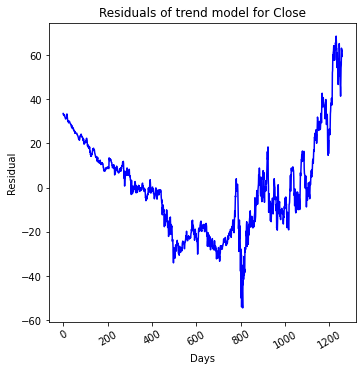

In [14]:
residuals = np.array(MSFT['Close']) - trend_model.predict(np.array(MSFT.index).reshape((-1,1)))
plt.figure(figsize=(5.5, 5.5))
pd.Series(data=residuals, index=MSFT.index).plot(color='b')
plt.title('Residuals of trend model for Close')
plt.xlabel('Days')
plt.ylabel('Residual')
plt.xticks(rotation=30)

In [15]:
MSFT['Residuals'] = residuals

Text(0, 0.5, 'Residual')

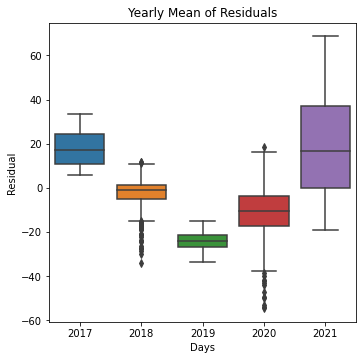

In [16]:
plt.figure(figsize=(5.5, 5.5))
g = sns.boxplot(data=MSFT, y='Residuals', x='Year')
g.set_title('Yearly Mean of Residuals')
g.set_xlabel('Days')
g.set_ylabel('Residual')

##### Seasonality Microsoft
In the case of Microsoft, the seasonality trends are similar with Apple. Wherein the first 3 years are a decreasing and the next 2 years are increasing tendencies. The difference lies in the variation of 2021 which is the highest deviation while Apple records 2020 as the highest deviation.

---

### Analisis Time Series

#### Proses Mengubah Data Non-Stationer Menjadi Stasioner

##### Menguji Ketasioneran data dengan Augmented Dickey Fuller Test

In [17]:
import statsmodels as sm
sm.tsa.stattools.adfuller(MSFT["Close"])
print("P-Value =",sm.tsa.stattools.adfuller(MSFT["Close"])[1])

P-Value = 0.9985231911398977


##### Dengan P Value yang Besar, Null Hypothesis diterima sehingga Disimpulkan Data Non Stasioner

---

#### Metode Diferensiasi Untuk Microsoft

In [18]:
MSFT["1st Difference"] = MSFT['Close'].diff(1)
MSFT

,Date,Open,High,Low,Close,Adj Close,Volume,Days Since 1 January 2017,Year,Residuals,1st Difference
0,2017-01-03,62.790001,62.840000,62.130001,62.580002,57.930531,20694100,1,2017,33.541646,NaN
1,2017-01-04,62.480000,62.750000,62.119999,62.299999,57.671326,21340000,2,2017,33.062074,-0.280003
2,2017-01-05,62.189999,62.660000,62.029999,62.299999,57.671326,24876000,3,2017,32.862505,0.000000
3,2017-01-06,62.299999,63.150002,62.040001,62.840000,58.171219,19922900,4,2017,33.202937,0.540001
4,2017-01-09,62.759998,63.080002,62.540001,62.639999,57.986069,20382700,5,2017,32.803367,-0.200001
...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-12-23,332.750000,336.390015,332.730011,334.690002,333.223267,19617800,1254,2021,55.591578,1.489990
1254,2021-12-27,335.459991,342.480011,335.429993,342.450012,340.949280,19947000,1255,2021,63.152019,7.760010
1255,2021-12-28,343.149994,343.809998,340.320007,341.250000,339.754517,15661500,1256,2021,61.752438,-1.200012
1256,2021-12-29,341.299988,344.299988,339.679993,341.950012,340.451477,15042000,1257,2021,62.252881,0.700012


##### Menerapkan Augmented Dickey-Fuller Test kepada Differensiasi tingkat 1

In [19]:
import statsmodels as sm
sm.tsa.stattools.adfuller(MSFT["1st Difference"].dropna())

(-8.819449222099944,
 1.8947102954522088e-14,
 15,
 1241,
 {'1%': -3.435630320520318,
  '5%': -2.863871779019612,
  '10%': -2.56801146937726},
 6062.173914103803)

##### Data Sudah Stasioner dan dapat dilanjutkan ketahap berikutnya dan visualisasi

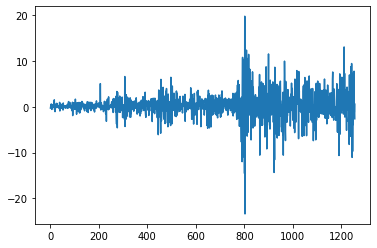

In [20]:
plt.plot(np.arange(len(MSFT["1st Difference"].dropna())),MSFT["1st Difference"].dropna())

---

#### ACF Test for Microsoft

In [21]:
lag = range(0,31)
MSFT_acf = []
for l in lag:
    MSFT_acf.append(MSFT['Close'].autocorr(l))

Text(0, 0.5, 'Autocorrelation function')

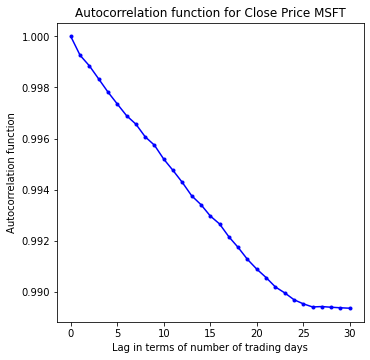

In [22]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(MSFT_acf, marker='.', color='b')
plt.title('Autocorrelation function for Close Price MSFT')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')

In [23]:
lag = range(0,31)
MSFT_acf = []
for l in lag:
    MSFT_acf.append(MSFT['1st Difference'].autocorr(l))

Text(0, 0.5, 'Autocorrelation function')

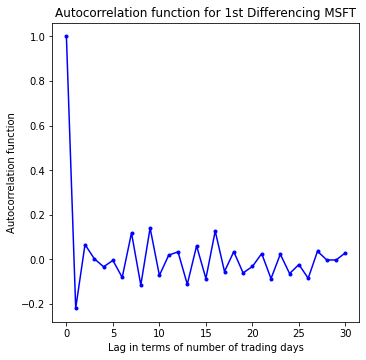

In [24]:
plt.figure(figsize=(5.5, 5.5))
plt.plot(MSFT_acf, marker='.', color='b')
plt.title('Autocorrelation function for 1st Differencing MSFT')
plt.xlabel('Lag in terms of number of trading days')
plt.ylabel('Autocorrelation function')

##### Dapat dilihat bahwa setelah dilakukan Differencing, Autocorrelation Function untuk Data Microsoft Jauh lebih baik ditandai dengan nilai yang mendekati 0 untuk setiap lag waktu. 

---

### Smoothing Using Moving Average Techniques

#### Smoothing Using Single Moving Average for Microsoft:

##### Dipilih Orde Moving Average adalah: 5, 15, 25, 35, dan 45

In [25]:
MSFT['5 MA'] = MSFT['1st Difference'].rolling(5).mean()
MSFT['15 MA'] = MSFT['1st Difference'].rolling(15).mean()
MSFT['25 MA'] = MSFT['1st Difference'].rolling(25).mean()
MSFT['35 MA'] = MSFT['1st Difference'].rolling(35).mean()
MSFT['45 MA'] = MSFT['1st Difference'].rolling(45).mean()

##### Plot for 5-Day Moving Average:

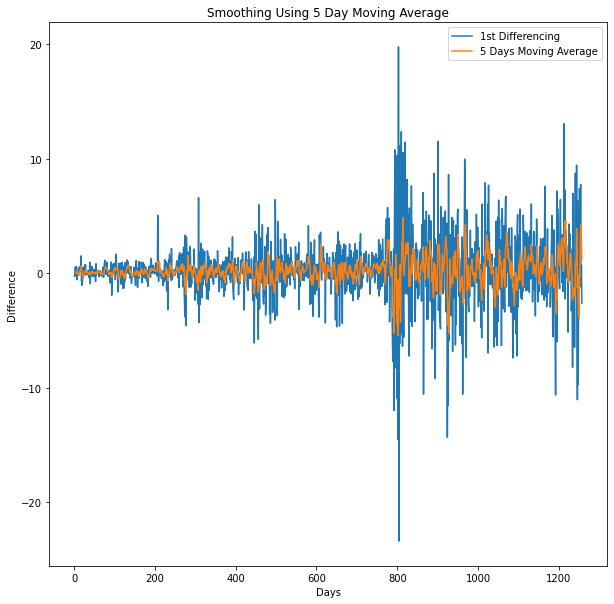

In [26]:
plt.figure(figsize=(10, 10))
MSFT["1st Difference"].plot(label="1st Differencing")
MSFT["5 MA"].plot(label="5 Days Moving Average")
plt.title("Smoothing Using 5 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

##### Plot for 15-Day Moving Average:

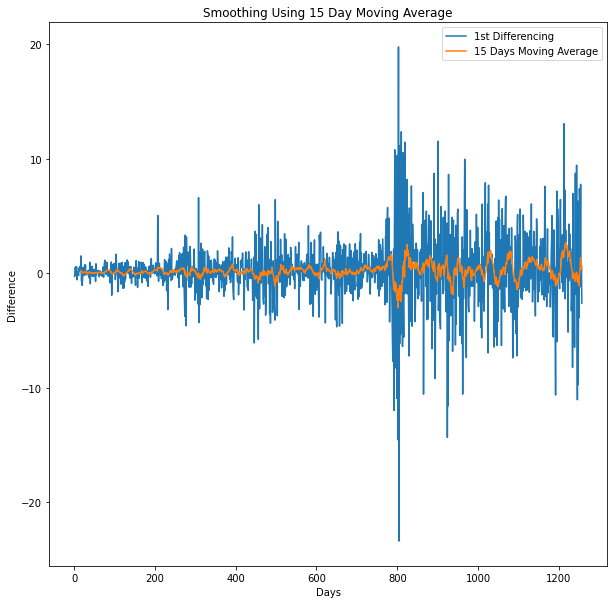

In [27]:
plt.figure(figsize=(10, 10))
MSFT["1st Difference"].plot(label="1st Differencing")
MSFT["15 MA"].plot(label="15 Days Moving Average")
plt.title("Smoothing Using 15 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

##### Plot for 25-Day Moving Average:

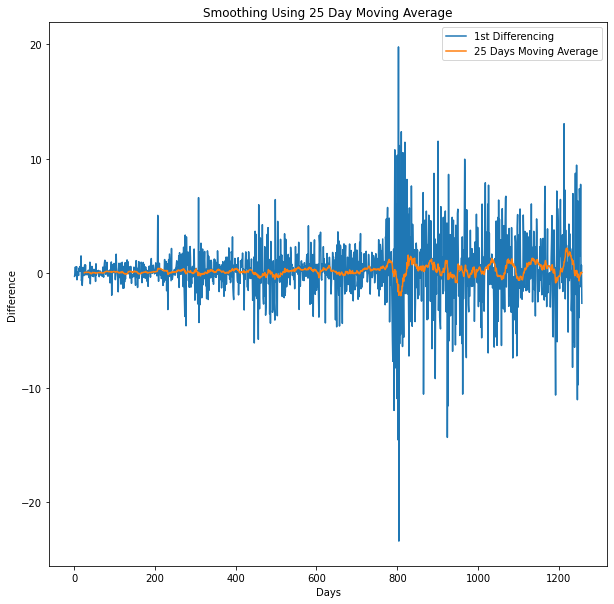

In [28]:
plt.figure(figsize=(10, 10))
MSFT["1st Difference"].plot(label="1st Differencing")
MSFT["25 MA"].plot(label="25 Days Moving Average")
plt.title("Smoothing Using 25 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

##### Plot for 35-Day Moving Average:

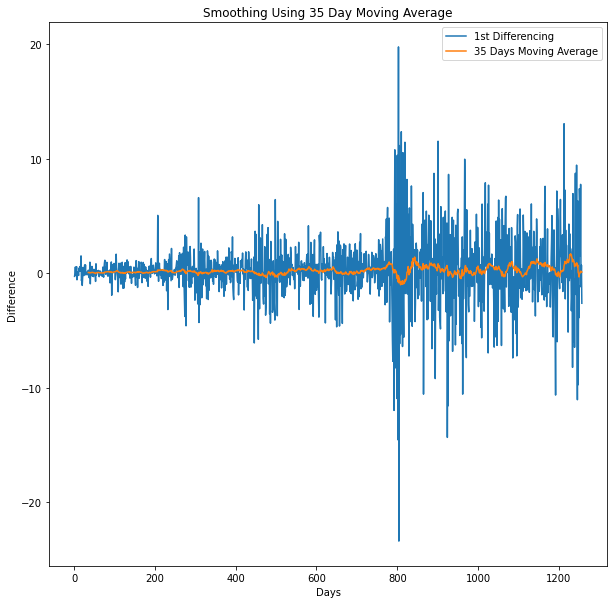

In [29]:
plt.figure(figsize=(10, 10))
MSFT["1st Difference"].plot(label="1st Differencing")
MSFT["35 MA"].plot(label="35 Days Moving Average")
plt.title("Smoothing Using 35 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

##### Plot for 45-Day Moving Average:

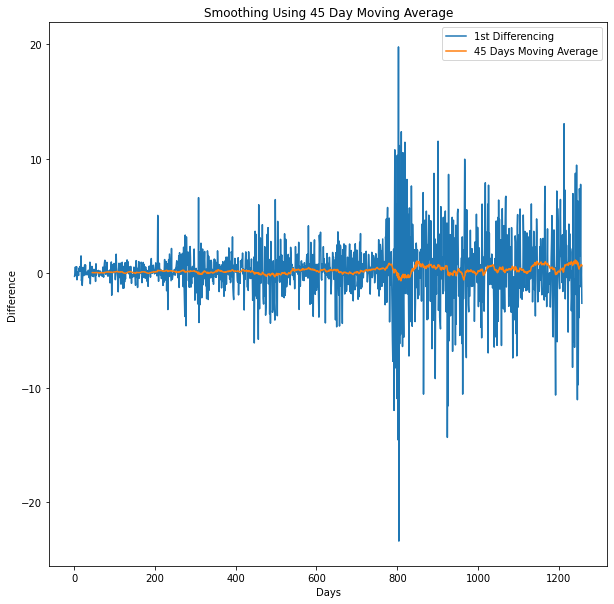

In [30]:
plt.figure(figsize=(10, 10))
MSFT["1st Difference"].plot(label="1st Differencing")
MSFT["45 MA"].plot(label="45 Days Moving Average")
plt.title("Smoothing Using 45 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

---

#### Reversing Difference to Smoothed Close Value

In [31]:
MSFT['5 MA'] = MSFT['5 MA'].fillna(0)
MSFT['15 MA'] = MSFT['15 MA'].fillna(0)
MSFT['25 MA'] = MSFT['25 MA'].fillna(0)
MSFT['35 MA'] = MSFT['35 MA'].fillna(0)
MSFT['45 MA'] = MSFT['45 MA'].fillna(0)
MSFT['1st Difference'] = MSFT['1st Difference'].fillna(0)

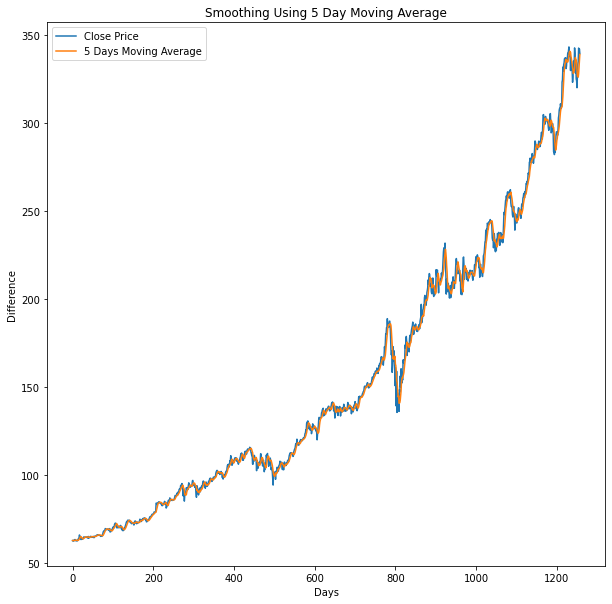

In [32]:
MA5Pred=[MSFT["Close"][4]]
for i in range(len(MSFT["5 MA"].dropna())-1):
    MA5Pred.append(MSFT["5 MA"].dropna()[i]+MA5Pred[i])
MSFT["5 MA Pred"]=MA5Pred
plt.figure(figsize=(10, 10))
MSFT["Close"].plot(label="Close Price")
MSFT["5 MA Pred"].plot(label="5 Days Moving Average")
plt.title("Smoothing Using 5 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

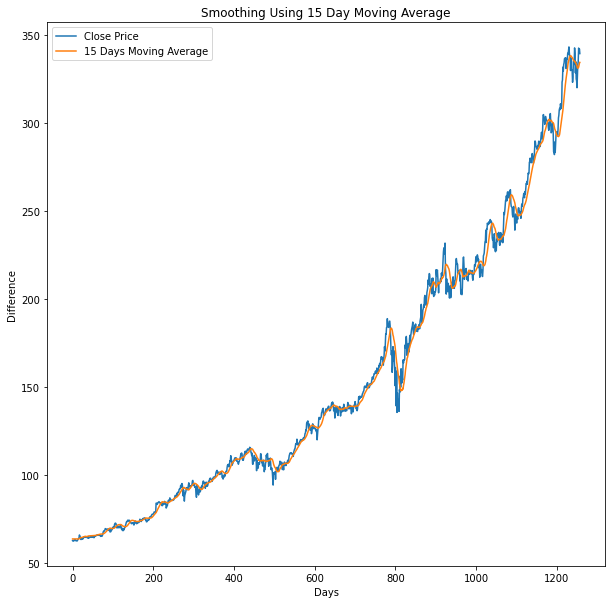

In [33]:
MA5Pred=[MSFT["Close"][14]]
for i in range(len(MSFT["15 MA"].dropna())-1):
    MA5Pred.append(MSFT["15 MA"].dropna()[i]+MA5Pred[i])
MSFT["15 MA Pred"]=MA5Pred
plt.figure(figsize=(10, 10))
MSFT["Close"].plot(label="Close Price")
MSFT["15 MA Pred"].plot(label="15 Days Moving Average")
plt.title("Smoothing Using 15 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

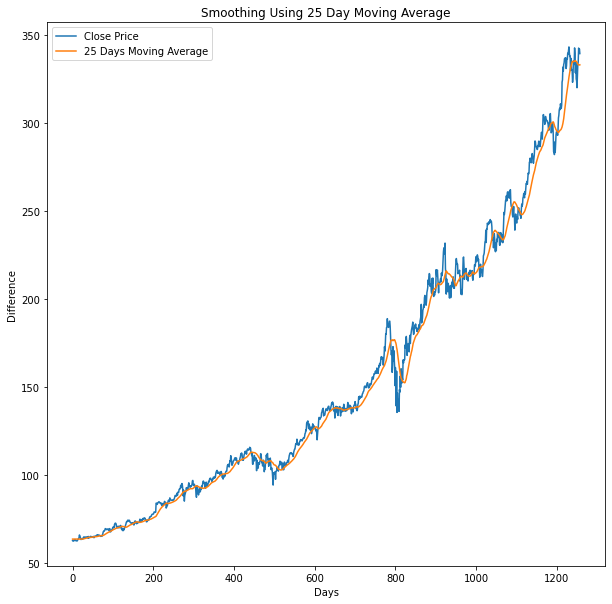

In [34]:
MA5Pred=[MSFT["Close"][24]]
for i in range(len(MSFT["25 MA"].dropna())-1):
    MA5Pred.append(MSFT["25 MA"].dropna()[i]+MA5Pred[i])
MSFT["25 MA Pred"]=MA5Pred
plt.figure(figsize=(10, 10))
MSFT["Close"].plot(label="Close Price")
MSFT["25 MA Pred"].plot(label="25 Days Moving Average")
plt.title("Smoothing Using 25 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

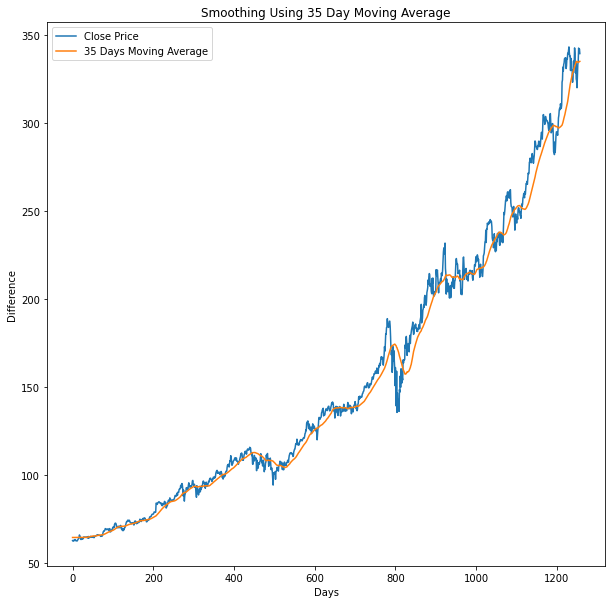

In [35]:
MA5Pred=[MSFT["Close"][34]]
for i in range(len(MSFT["35 MA"].dropna())-1):
    MA5Pred.append(MSFT["35 MA"].dropna()[i]+MA5Pred[i])
MSFT["35 MA Pred"]=MA5Pred
plt.figure(figsize=(10, 10))
MSFT["Close"].plot(label="Close Price")
MSFT["35 MA Pred"].plot(label="35 Days Moving Average")
plt.title("Smoothing Using 35 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

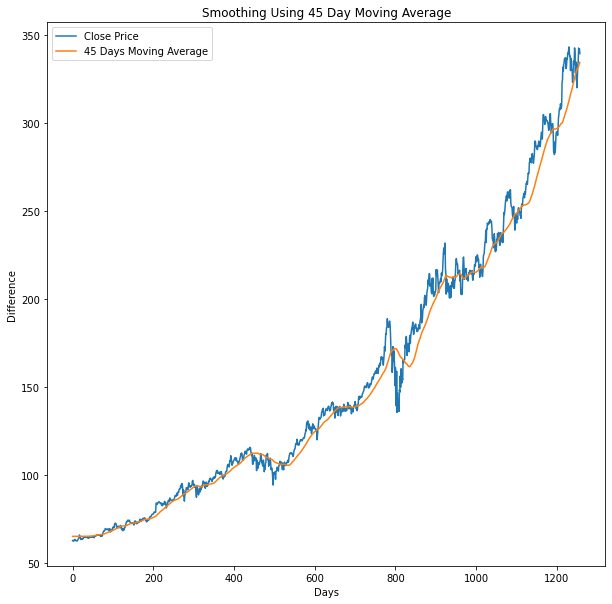

In [36]:
MA5Pred=[MSFT["Close"][44]]
for i in range(len(MSFT["45 MA"].dropna())-1):
    MA5Pred.append(MSFT["45 MA"].dropna()[i]+MA5Pred[i])
MSFT["45 MA Pred"]=MA5Pred
plt.figure(figsize=(10, 10))
MSFT["Close"].plot(label="Close Price")
MSFT["45 MA Pred"].plot(label="45 Days Moving Average")
plt.title("Smoothing Using 45 Day Moving Average")
plt.xlabel("Days")
plt.ylabel("Difference")
plt.legend()

---

#### Smoothing Using Double Moving Average for Apple:

##### Double Moving Average is essentially the same as single moving average, but it is done twice, so now we will do the 1st one:

In [37]:
AAPL['5 MA'] = AAPL['Close'].rolling(5).mean()
AAPL['15 MA'] = AAPL['Close'].rolling(15).mean()
AAPL['25 MA'] = AAPL['Close'].rolling(25).mean()
AAPL['35 MA'] = AAPL['Close'].rolling(35).mean()
AAPL['45 MA'] = AAPL['Close'].rolling(45).mean()

##### And now for the 2nd one:

In [38]:
AAPL['5 DMA'] = AAPL['5 MA'].rolling(5).mean()
AAPL['15 DMA'] = AAPL['15 MA'].rolling(15).mean()
AAPL['25 DMA'] = AAPL['25 MA'].rolling(25).mean()
AAPL['35 DMA'] = AAPL['35 MA'].rolling(35).mean()
AAPL['45 DMA'] = AAPL['45 MA'].rolling(45).mean()
AAPL

,Date,Open,High,Low,Close,Adj Close,Volume,Days Since 1 January 2017,Year,Residuals,5 MA,15 MA,25 MA,35 MA,45 MA,5 DMA,15 DMA,25 DMA,35 DMA,45 DMA
0,2017-01-03,28.950001,29.082500,28.690001,29.037500,27.257641,115127600,1,2017,18.542578,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-01-04,28.962500,29.127501,28.937500,29.004999,27.227131,84472400,2,2017,18.408007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-01-05,28.980000,29.215000,28.952499,29.152500,27.365591,88774400,3,2017,18.453437,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-01-06,29.195000,29.540001,29.117500,29.477501,27.670675,127007600,4,2017,18.676368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-01-09,29.487499,29.857500,29.485001,29.747499,27.924118,134247600,5,2017,18.844295,29.284000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-12-23,175.850006,176.850006,175.270004,176.279999,175.797394,68356600,1254,2021,37.890885,173.160000,172.990667,168.341201,163.208286,160.224668,173.3028,166.772001,157.953297,152.595723,150.207106
1254,2021-12-27,177.089996,180.419998,177.070007,180.330002,179.836319,74919600,1255,2021,41.838818,174.998001,174.223334,169.239601,164.047429,160.910224,173.3916,167.809156,158.724705,153.117968,150.515200
1255,2021-12-28,180.160004,181.330002,178.529999,179.289993,178.799164,79144300,1256,2021,40.696739,176.906000,175.154666,169.989200,164.847715,161.590223,174.1016,168.840267,159.500961,153.658817,150.837423
1256,2021-12-29,179.330002,180.630005,178.139999,179.380005,178.888916,62348900,1257,2021,40.684680,178.184000,175.701334,170.723600,165.674572,162.273335,175.1208,169.813689,160.283441,154.217168,151.174603


---

##### Plot for 5-Day Double Moving Average:

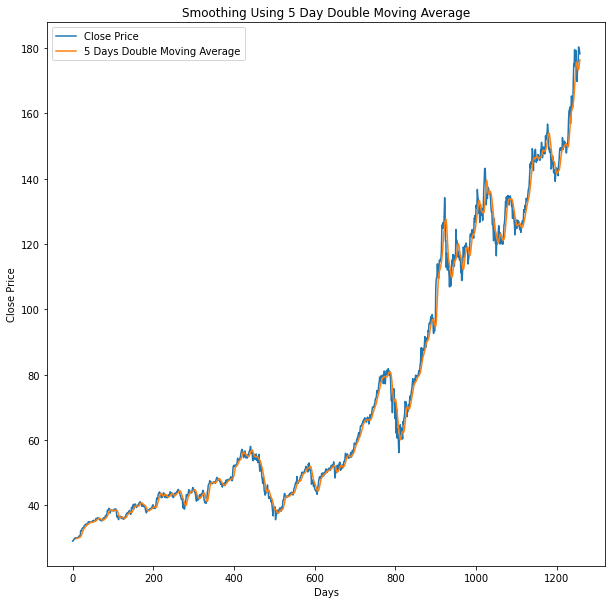

In [39]:
plt.figure(figsize=(10, 10))
AAPL["Close"].plot(label="Close Price")
AAPL["5 DMA"][10:].plot(label="5 Days Double Moving Average")
plt.title("Smoothing Using 5 Day Double Moving Average")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()

##### Plot for 15-Day Double Moving Average:

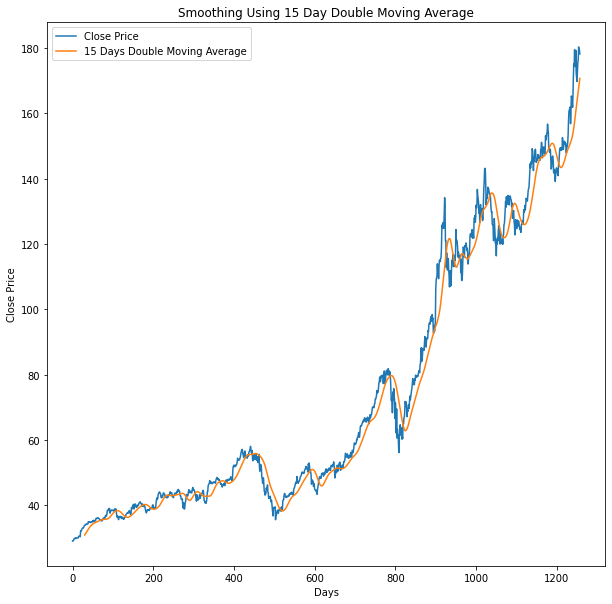

In [40]:
plt.figure(figsize=(10, 10))
AAPL["Close"].plot(label="Close Price")
AAPL["15 DMA"][30:].plot(label="15 Days Double Moving Average")
plt.title("Smoothing Using 15 Day Double Moving Average")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()

##### Plot for 25-Day Double Moving Average:

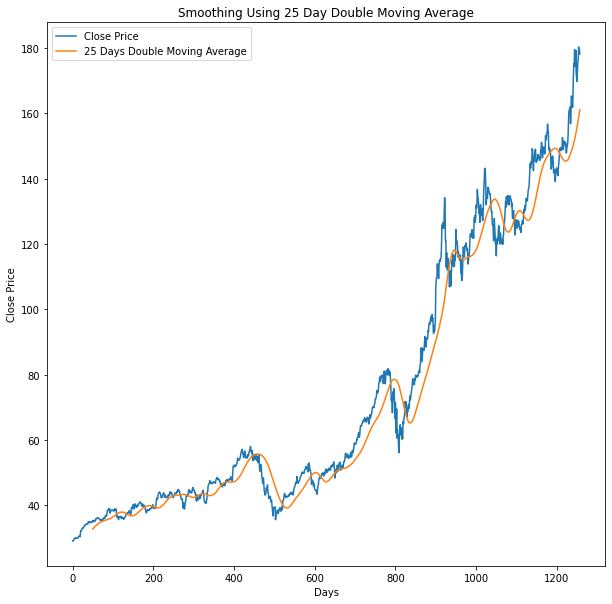

In [41]:
plt.figure(figsize=(10, 10))
AAPL["Close"].plot(label="Close Price")
AAPL["25 DMA"][50:].plot(label="25 Days Double Moving Average")
plt.title("Smoothing Using 25 Day Double Moving Average")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()

##### Plot for 35-Day Double Moving Average:

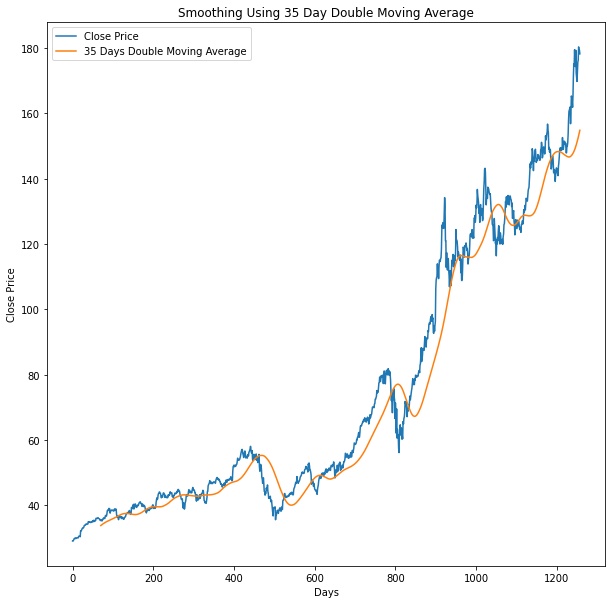

In [42]:
plt.figure(figsize=(10, 10))
AAPL["Close"].plot(label="Close Price")
AAPL["35 DMA"][70:].plot(label="35 Days Double Moving Average")
plt.title("Smoothing Using 35 Day Double Moving Average")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()

##### Plot for 45-Day Double Moving Average:

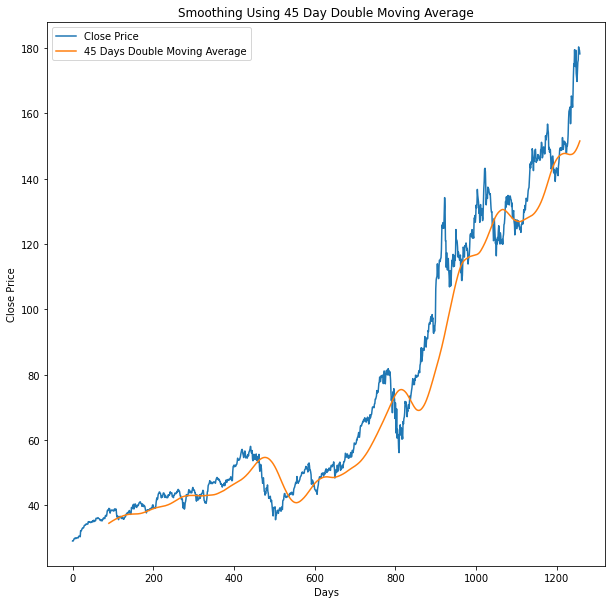

In [43]:
plt.figure(figsize=(10, 10))
AAPL["Close"].plot(label="Close Price")
AAPL["45 DMA"][90:].plot(label="45 Days Double Moving Average")
plt.title("Smoothing Using 45 Day Double Moving Average")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()

---

#### Accuracy Testing For Each Method Using MAD (Mean Absolute Deviation), MSD (Mean Squared Deviation) and MAPE (Mean Absolute Percentage Error)

##### MAD for Microsoft:

In [44]:
print('MAD for MA 5:',MSFT['5 MA'].mad())
print('MAD for MA 15:',MSFT['15 MA'].mad())
print('MAD for MA 25:',MSFT['25 MA'].mad())
print('MAD for MA 35:',MSFT['35 MA'].mad())
print('MAD for MA 45:',MSFT['45 MA'].mad())

MAD for MA 5: 0.7371189329579089
MAD for MA 15: 0.40080827852960976
MAD for MA 25: 0.30238843836296037
MAD for MA 35: 0.23873676970637522
MAD for MA 45: 0.20367218261617084


##### A higher value in MAD suggests that the data is more spread apart, while lower MAD suggests that the data is clustered together.

##### MSD for Microsoft:

In [45]:
MSFT_MSD5MA = np.mean((MSFT["1st Difference"] - MSFT["5 MA"])**2)
MSFT_MSD15MA = np.mean((MSFT["1st Difference"] - MSFT["15 MA"])**2)
MSFT_MSD25MA = np.mean((MSFT["1st Difference"] - MSFT["25 MA"])**2)
MSFT_MSD35MA = np.mean((MSFT["1st Difference"] - MSFT["35 MA"])**2)
MSFT_MSD45MA = np.mean((MSFT["1st Difference"] - MSFT["45 MA"])**2)
print('MSD for MA 5:',MSFT_MSD5MA)
print('MSD for MA 15:',MSFT_MSD15MA)
print('MSD for MA 25:',MSFT_MSD25MA)
print('MSD for MA 35:',MSFT_MSD35MA)
print('MSD for MA 45:',MSFT_MSD45MA)

MSD for MA 5: 6.890233050408402
MSD for MA 15: 7.8904915165699
MSD for MA 25: 8.201537341992498
MSD for MA 35: 8.272802182102149
MSD for MA 45: 8.304728368286371


##### To interpret MSD, a value of 0 suggests that it has no errors therefore it is a perfect model, while a value of not 0 suggests that it still has errors.

##### MAPE for Microsoft:

In [46]:
mape_5 = mean_absolute_error(MSFT['1st Difference'], MSFT['5 MA'])*1
mape_15 = mean_absolute_error(MSFT['1st Difference'], MSFT['15 MA'])*1
mape_25 = mean_absolute_error(MSFT['1st Difference'], MSFT['25 MA'])*1
mape_35 = mean_absolute_error(MSFT['1st Difference'], MSFT['35 MA'])*1
mape_45 = mean_absolute_error(MSFT['1st Difference'], MSFT['45 MA'])*1

print('MAPE for MA 5:',mape_5)
print('MAPE for MA 15:',mape_15)
print('MAPE for MA 25:',mape_25)
print('MAPE for MA 35:',mape_35)
print('MAPE for MA 45:',mape_45)

MAPE for MA 5: 1.6717361578696344
MAPE for MA 15: 1.768354053100159
MAPE for MA 25: 1.7916020009856914
MAPE for MA 35: 1.8000920556438795
MAPE for MA 45: 1.8090190386150857


##### To interpret MAPE, a higher MAPE value is considered less accurate, and a lower MAPE value is considered more accurate with a value below 10 usually being considered as a good model. In this case, all of the MAPE values for Microsoft has a value below 2 which indicates that it is an excellent model.

---

##### MAD For Apple:

In [47]:
print('MAD for DMA 5:',AAPL['5 DMA'].mad())
print('MAD for DMA 15:',AAPL['15 DMA'].mad())
print('MAD for DMA 25:',AAPL['25 DMA'].mad())
print('MAD for DMA 35:',AAPL['35 DMA'].mad())
print('MAD for DMA 45:',AAPL['45 DMA'].mad())

MAD for DMA 5: 34.995232518087676
MAD for DMA 15: 34.22243079259163
MAD for DMA 25: 33.51174524140398
MAD for DMA 35: 32.85211960788974
MAD for DMA 45: 32.21468173510201


##### A higher value in MAD suggests that the data is more spread apart, while lower MAD suggests that the data is clustered together.

##### MSD For Apple:

In [48]:
AAPL_MSD5DMA = np.mean((AAPL["Close"] - AAPL["5 DMA"])**2)
AAPL_MSD15DMA = np.mean((AAPL["Close"] - AAPL["15 DMA"])**2)
AAPL_MSD25DMA = np.mean((AAPL["Close"] - AAPL["25 DMA"])**2)
AAPL_MSD35DMA = np.mean((AAPL["Close"] - AAPL["35 DMA"])**2)
AAPL_MSD45DMA = np.mean((AAPL["Close"] - AAPL["45 DMA"])**2)
print('MSD for DMA 5:',AAPL_MSD5DMA)
print('MSD for DMA 15:',AAPL_MSD15DMA)
print('MSD for DMA 25:',AAPL_MSD25DMA)
print('MSD for DMA 35:',AAPL_MSD35DMA)
print('MSD for DMA 45:',AAPL_MSD45DMA)

MSD for DMA 5: 6.668422352349657
MSD for DMA 15: 27.474713796605855
MSD for DMA 25: 50.97767485543894
MSD for DMA 35: 73.6862063775654
MSD for DMA 45: 95.80964578264098


##### To interpret MSD, a value of 0 suggests that it has no errors therefore it is a perfect model, while a value of not 0 suggests that it still has errors.

##### MAPE for Apple

In [49]:
AAPL['5 DMA'] = AAPL['5 DMA'].fillna(0)
AAPL['15 DMA'] = AAPL['15 DMA'].fillna(0)
AAPL['25 DMA'] = AAPL['25 DMA'].fillna(0)
AAPL['35 DMA'] = AAPL['35 DMA'].fillna(0)
AAPL['45 DMA'] = AAPL['45 DMA'].fillna(0)

In [50]:
mape_AAPL_5 = mean_absolute_error(AAPL['Close'], AAPL['5 DMA'])
mape_AAPL_15 = mean_absolute_error(AAPL['Close'], AAPL['15 DMA'])
mape_AAPL_25 = mean_absolute_error(AAPL['Close'], AAPL['25 DMA'])
mape_AAPL_35 = mean_absolute_error(AAPL['Close'], AAPL['35 DMA'])
mape_AAPL_45 = mean_absolute_error(AAPL['Close'], AAPL['45 DMA'])

print('MAPE for DMA 5:',mape_AAPL_5)
print('MAPE for DMA 15:',mape_AAPL_15)
print('MAPE for DMA 25:',mape_AAPL_25)
print('MAPE for DMA 35:',mape_AAPL_35)
print('MAPE for DMA 45:',mape_AAPL_45)

MAPE for DMA 5: 1.883951124038156
MAPE for DMA 15: 4.383247577406819
MAPE for DMA 25: 6.247448420755485
MAPE for DMA 35: 7.641103539395217
MAPE for DMA 45: 8.912789070539953


##### To interpret MAPE, a higher MAPE value is considered less accurate, and a lower MAPE value is considered more accurate with a value below 10 usually being considered as a good model. In this case, the MAPE value for Apple varies a bit, with 2 values being lower than 5 which indicates that it is an excellent model, while the rest has a value bigger than 5.

Summary

In [51]:
AccuracyMSFT=pd.DataFrame()
AccuracyMSFT["Moving Average"]=["5 Day","15 Day","25 Day","35 Day","45 Day",]
AccuracyMSFT["MAD"]=[MSFT['5 MA'].mad(),MSFT['15 MA'].mad(),MSFT['25 MA'].mad(),MSFT['35 MA'].mad(),MSFT['45 MA'].mad()]
AccuracyMSFT["MSD"]=[MSFT_MSD5MA,MSFT_MSD15MA,MSFT_MSD25MA,MSFT_MSD35MA,MSFT_MSD45MA]
AccuracyMSFT["MAPE"]=[mape_5,mape_15,mape_25,mape_35,mape_45]
AccuracyMSFT

,Moving Average,MAD,MSD,MAPE
0,5 Day,0.737119,6.890233,1.671736
1,15 Day,0.400808,7.890492,1.768354
2,25 Day,0.302388,8.201537,1.791602
3,35 Day,0.238737,8.272802,1.800092
4,45 Day,0.203672,8.304728,1.809019


In [52]:
AccuracyAAPL=pd.DataFrame()
AccuracyAAPL["Moving Average"]=["5 Day","15 Day","25 Day","35 Day","45 Day",]
AccuracyAAPL["MAD"]=[AAPL['5 MA'].mad(),AAPL['15 MA'].mad(),AAPL['25 MA'].mad(),AAPL['35 MA'].mad(),AAPL['45 MA'].mad()]
AccuracyAAPL["MSD"]=[AAPL_MSD5DMA,AAPL_MSD15DMA,AAPL_MSD25DMA,AAPL_MSD35DMA,AAPL_MSD45DMA]
AccuracyAAPL["MAPE"]=[mape_AAPL_5,mape_AAPL_15,mape_AAPL_25,mape_AAPL_35,mape_AAPL_45]
AccuracyAAPL

,Moving Average,MAD,MSD,MAPE
0,5 Day,35.151899,6.668422,1.883951
1,15 Day,34.752893,27.474714,4.383248
2,25 Day,34.348987,50.977675,6.247448
3,35 Day,33.964489,73.686206,7.641104
4,45 Day,33.597699,95.809646,8.912789


##### The two tables above shows all the results for the accuracy test for both Apple and Microsoft, which are:
##### - MAD -> Mean Absolute Deviation
##### - MSD -> Mean Squared Deviation
##### - MAPE -> Mean Absolute Percentage Error

---

#### Conclusion of Accuracy Test

##### If we conclude the results of our analysis, we have determined that microsoft is the better model to use. Reason being that from all the accuracy tests (MAPE, MSD and MAD), MSFT has a much better reading than AAPL. On average MSFT shows lower test numbers accross all m values indicating more accuracy and less error.

---

### Forecasting MSFT and AAPL

##### Forecasting for Microsoft

In [63]:
ForecastMSFT5MA=np.repeat(MSFT["5 MA"][1257],50)
ForecastMSFT15MA=np.repeat(MSFT["15 MA"][1257],50)
ForecastMSFT25MA=np.repeat(MSFT["25 MA"][1257],50)
ForecastMSFT35MA=np.repeat(MSFT["35 MA"][1257],50)
ForecastMSFT45MA=np.repeat(MSFT["45 MA"][1257],50)

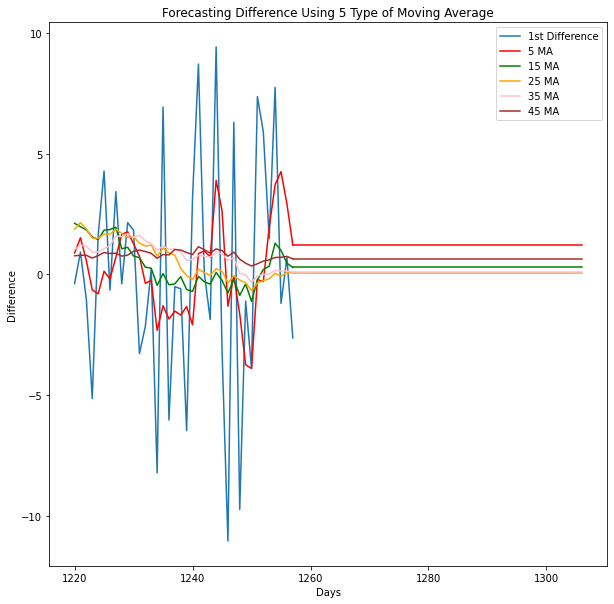

In [77]:
plt.figure(figsize=(10,10))
plt.title("Forecasting MSFT Difference Using 5 Type of Moving Average")
plt.ylabel("Difference")
plt.xlabel("Days")
MSFT["1st Difference"][1220:].plot()
MSFT["5 MA"][1220:].plot(color="red")
plt.plot(np.arange(1257,1257+50),ForecastMSFT5MA, color="red")
MSFT["15 MA"][1220:].plot(color="green")
plt.plot(np.arange(1257,1257+50),ForecastMSFT15MA, color="green")
MSFT["25 MA"][1220:].plot(color="Orange")
plt.plot(np.arange(1257,1257+50),ForecastMSFT25MA, color="Orange")
MSFT["35 MA"][1220:].plot(color="Pink")
plt.plot(np.arange(1257,1257+50),ForecastMSFT35MA, color="pink")
MSFT["45 MA"][1220:].plot(color="brown")
plt.plot(np.arange(1257,1257+50),ForecastMSFT45MA, color="brown")
plt.legend()

##### Applying Concept to Forecast Close value

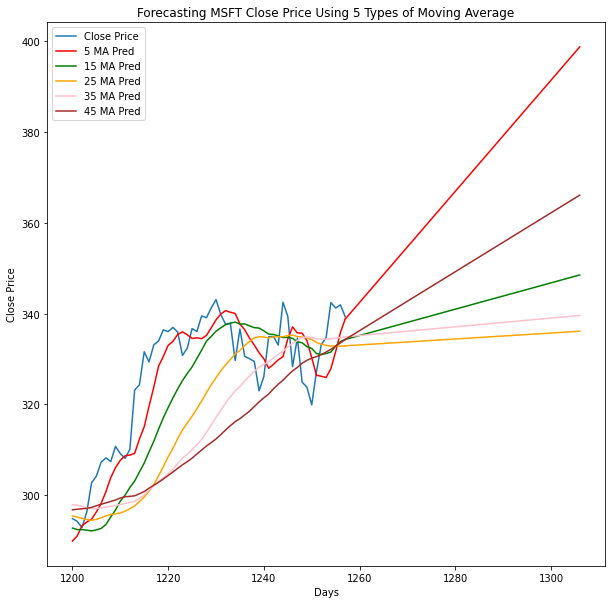

In [98]:
MA5Fore=[MSFT["5 MA Pred"][1257]]
for i in range(49):
    MA5Fore.append(ForecastMSFT5MA[i]+MA5Fore[i])

MA15Fore=[MSFT["15 MA Pred"][1257]]
for i in range(49):
    MA15Fore.append(ForecastMSFT15MA[i]+MA15Fore[i])

MA25Fore=[MSFT["25 MA Pred"][1257]]
for i in range(49):
    MA25Fore.append(ForecastMSFT25MA[i]+MA25Fore[i])

MA35Fore=[MSFT["35 MA Pred"][1257]]
for i in range(49):
    MA35Fore.append(ForecastMSFT35MA[i]+MA35Fore[i])

MA45Fore=[MSFT["45 MA Pred"][1257]]
for i in range(49):
    MA45Fore.append(ForecastMSFT45MA[i]+MA45Fore[i])


plt.figure(figsize=(10, 10))
MSFT["Close"][1200:].plot(label="Close Price")
plt.plot(np.arange(1257,1257+50),MA5Fore,color="red")
MSFT["5 MA Pred"][1200:].plot(color="red")
plt.plot(np.arange(1257,1257+50),MA15Fore,color="green")
MSFT["15 MA Pred"][1200:].plot(color="green")
plt.plot(np.arange(1257,1257+50),MA25Fore,color="orange")
MSFT["25 MA Pred"][1200:].plot(color="orange")
plt.plot(np.arange(1257,1257+50),MA35Fore,color="pink")
MSFT["35 MA Pred"][1200:].plot(color="pink")
plt.plot(np.arange(1257,1257+50),MA45Fore,color="brown")
MSFT["45 MA Pred"][1200:].plot(color="brown")
plt.title("Forecasting MSFT Close Price Using 5 Types of Moving Average")
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.legend()

---

##### Forecasting for Apple

In [92]:
ForecastAAPL5DMA=np.repeat(AAPL["5 DMA"][1257],50)
ForecastAAPL15DMA=np.repeat(AAPL["15 DMA"][1257],50)
ForecastAAPL25DMA=np.repeat(AAPL["25 DMA"][1257],50)
ForecastAAPL35DMA=np.repeat(AAPL["35 DMA"][1257],50)
ForecastAAPL45DMA=np.repeat(AAPL["45 DMA"][1257],50)

Text(0.5, 1.0, 'Forecasting AAPL Close Price Using 5 Types of Moving Average')

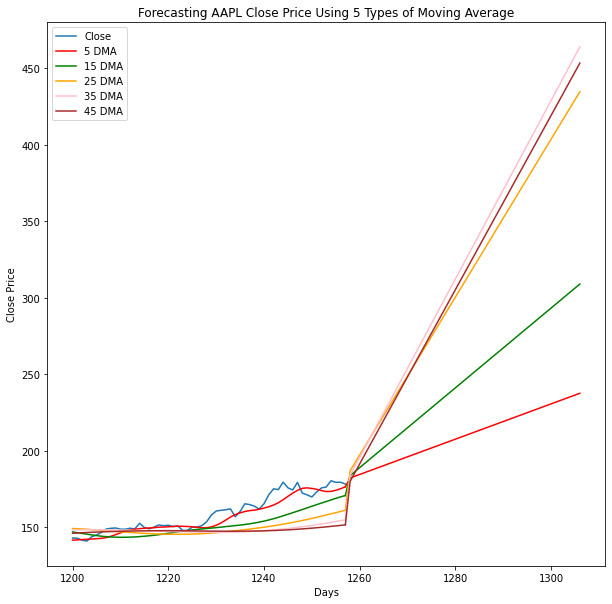

In [99]:
DMA5Fore=[AAPL["5 DMA"][1257]]
AtDMA5=AAPL["5 MA"][1257]*2-AAPL["5 DMA"][1257]
BtDMA5=2/4*(AAPL["5 MA"][1257]-AAPL["5 DMA"][1257])
for i in range(49):
    DMA5Fore.append(AtDMA5+BtDMA5*(i+1))

DMA15Fore=[AAPL["15 DMA"][1257]]
AtDMA15=AAPL["15 MA"][1257]*2-AAPL["15 DMA"][1257]
BtDMA15=2/4*(AAPL["15 MA"][1257]-AAPL["15 DMA"][1257])
for i in range(49):
    DMA15Fore.append(AtDMA15+BtDMA15*(i+1))

DMA25Fore=[AAPL["25 DMA"][1257]]
AtDMA25=AAPL["25 MA"][1257]*2-AAPL["25 DMA"][1257]
BtDMA25=2/4*(AAPL["25 MA"][1257]-AAPL["25 DMA"][1257])
for i in range(49):
    DMA25Fore.append(AtDMA25+BtDMA25*(i+1))

DMA35Fore=[AAPL["35 DMA"][1257]]
AtDMA35=AAPL["35 MA"][1257]*2-AAPL["35 DMA"][1257]
BtDMA35=2/4*(AAPL["35 MA"][1257]-AAPL["35 DMA"][1257])
for i in range(49):
    DMA35Fore.append(AtDMA35+BtDMA35*(i+1))

DMA45Fore=[AAPL["45 DMA"][1257]]
AtDMA45=AAPL["45 MA"][1257]*2-AAPL["45 DMA"][1257]
BtDMA45=2/4*(AAPL["45 MA"][1257]-AAPL["45 DMA"][1257])
for i in range(49):
    DMA45Fore.append(AtDMA45+BtDMA45*(i+1))

plt.figure(figsize=(10, 10))
AAPL["Close"][1200:].plot()
AAPL["5 DMA"][1200:].plot(color="red")
plt.plot(np.arange(1257,1257+50),DMA5Fore,color="red")
AAPL["15 DMA"][1200:].plot(color="green")
plt.plot(np.arange(1257,1257+50),DMA15Fore,color="green")
AAPL["25 DMA"][1200:].plot(color="orange")
plt.plot(np.arange(1257,1257+50),DMA25Fore,color="orange")
AAPL["35 DMA"][1200:].plot(color="pink")
plt.plot(np.arange(1257,1257+50),DMA35Fore,color="pink")
AAPL["45 DMA"][1200:].plot(color="brown")
plt.plot(np.arange(1257,1257+50),DMA45Fore,color="brown")
plt.legend()
plt.xlabel("Days")
plt.ylabel("Close Price")
plt.title("Forecasting AAPL Close Price Using 5 Types of Moving Average")

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a9961c84-08f1-46ef-a31a-239896905926' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>